<a href="https://colab.research.google.com/github/Ahana-14/ML_Project/blob/main/10)diabetese_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Applying SVM, Naive Bayes, Decision tree and KNN to predict diabetes based on features set. Compare the four classification algorithms with performance metrics such as accuracy, recall, precision, F1- score. Also, design the heat map confusion matrix for the above algorithms and construct ROC curve for comparison.
Dataset: pima-indians-diabetes.data.csv


In [ ]:
from google.colab import files
uploaded_diabetes=files.upload()

Saving diabetes (1).csv to diabetes (1) (1).csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_csv('diabetes (1) (1).csv')


X = df.drop(columns=['Outcome'])
y = df['Outcome']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize classifiers
models = {
    'SVM': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

In [ ]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_prob': y_prob,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision,
        'f1': f1
    }

    print(f"{name} - Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, F1: {f1:.4f}")


SVM - Accuracy: 0.7662, Recall: 0.5636, Precision: 0.7209, F1: 0.6327
Naive Bayes - Accuracy: 0.7662, Recall: 0.7091, Precision: 0.6610, F1: 0.6842
Decision Tree - Accuracy: 0.7727, Recall: 0.7091, Precision: 0.6724, F1: 0.6903
KNN - Accuracy: 0.6623, Recall: 0.5818, Precision: 0.5246, F1: 0.5517


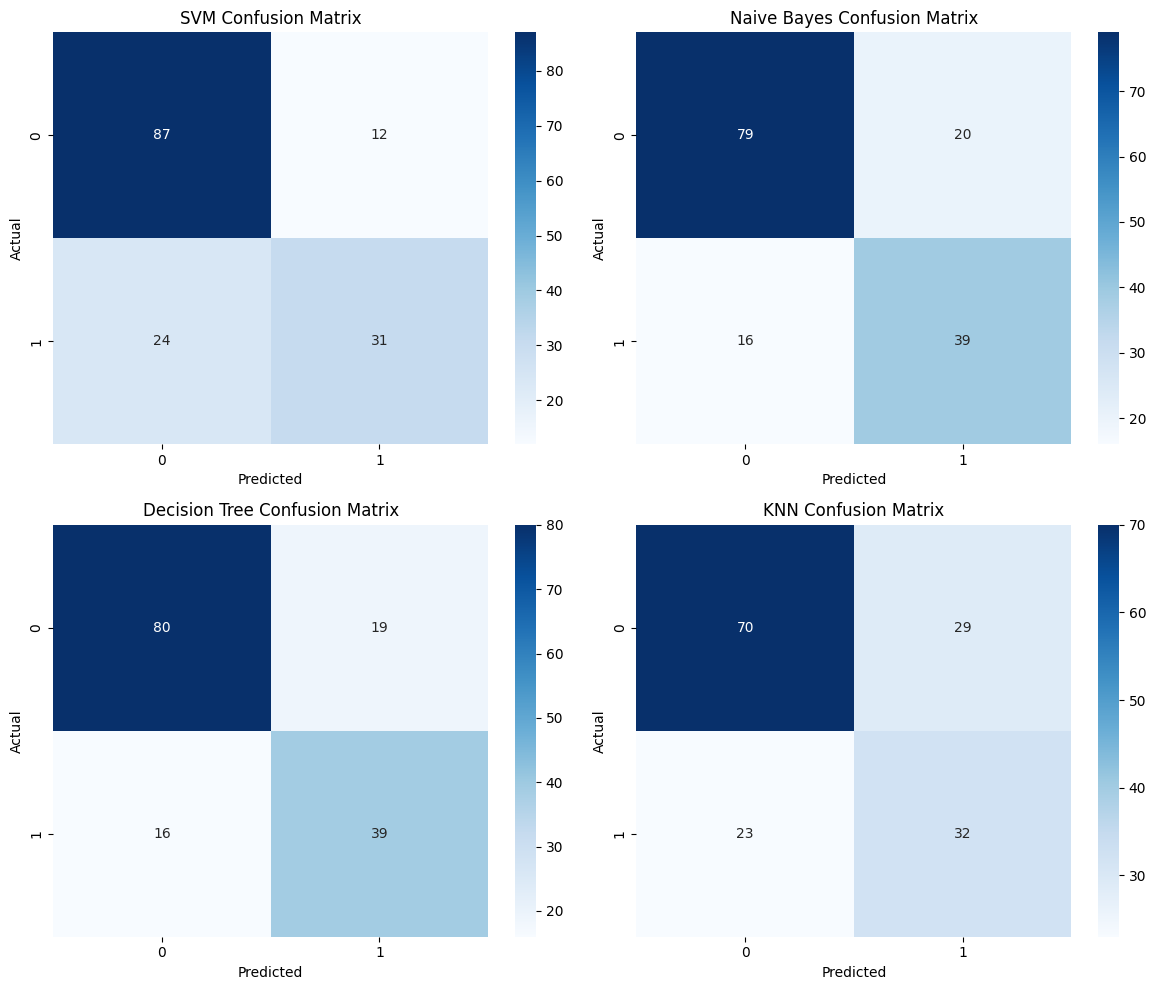

In [ ]:
plt.figure(figsize=(12, 10))
for i, (name, res) in enumerate(results.items(), 1):
    cm = confusion_matrix(y_test, res['y_pred'])
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

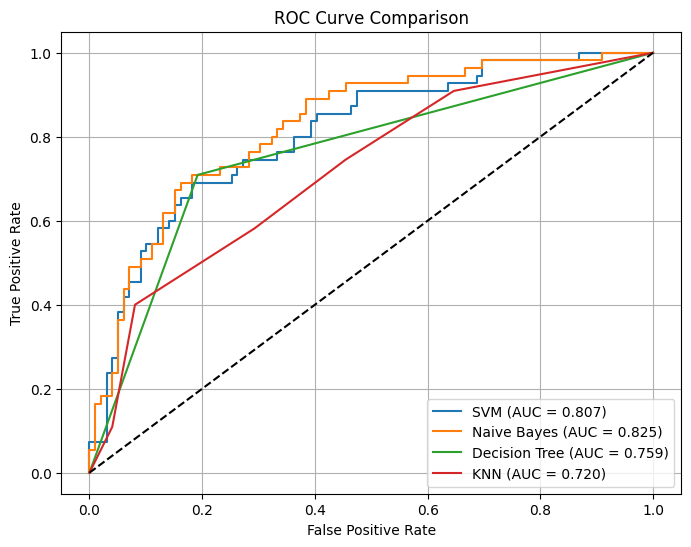

In [ ]:
plt.figure(figsize=(8, 6))
for name, res in results.items():
    if res['y_prob'] is not None:
        fpr, tpr, _ = roc_curve(y_test, res['y_prob'])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()